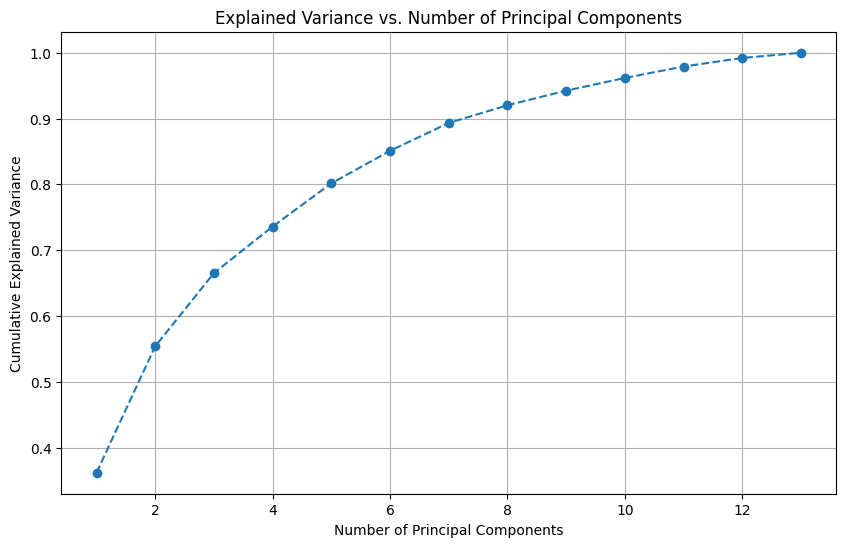

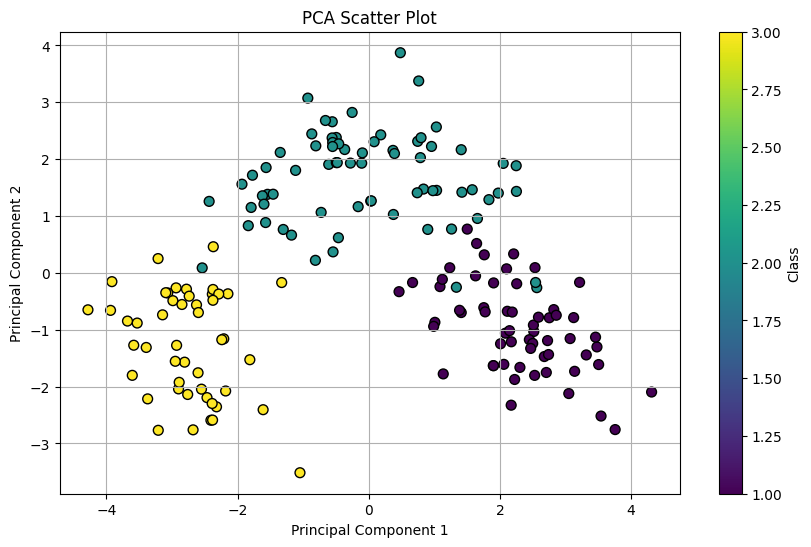

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


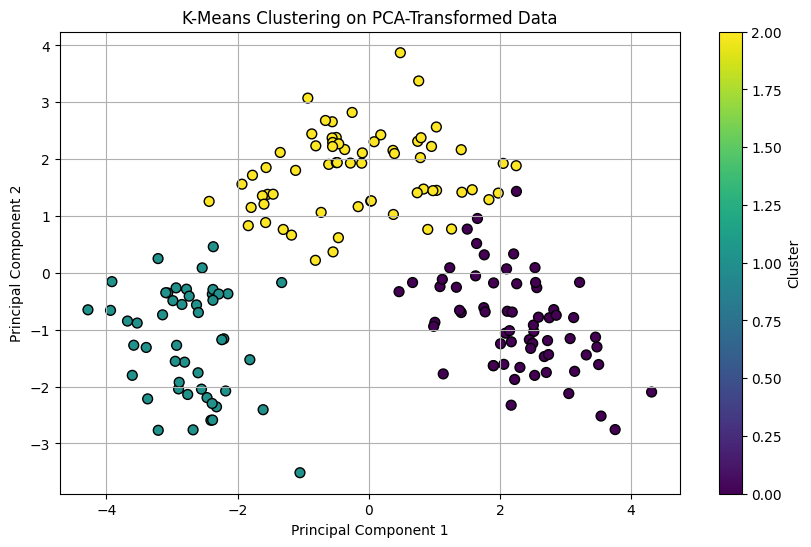

Silhouette Score: 0.5610505693103248
             Metric     Value
0  Silhouette Score  0.561051


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
file_path = '/content/wine.data'
columns = [
    'Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
    'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
    'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline'
]
wine_df = pd.read_csv(file_path, header=None, names=columns)

# Split the dataset into features and target variable
X = wine_df.drop('Class', axis=1)
y = wine_df['Class']

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of principal components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

# Visualise the results of PCA using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

# Perform clustering on the PCA-transformed data using K-Means clustering algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca[:, :2])  # Using the first two principal components

# Visualise the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-Transformed Data')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Evaluate clustering performance
silhouette_avg = silhouette_score(X_pca[:, :2], kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Create a table showing the performance metrics for the clustering algorithm
performance_metrics = pd.DataFrame({
    'Metric': ['Silhouette Score'],
    'Value': [silhouette_avg]
})

print(performance_metrics)



Summary of PCA Implementation and Clustering on Wine Dataset

PCA Results:
1. Explained Variance Ratio:

- The first two principal components explain around 60% of the variance, indicating a significant dimensionality reduction with minimal information loss.

- Cumulative explained variance reaches over 90% with about 6-7 components.

2. PCA Scatter Plot:

- The scatter plot of the first two principal components shows clear separation of the three wine classes, indicating good discriminative power.

K-Means Clustering on PCA-Transformed Data:
1. Clustering Results:
- K-Means clustering was performed on the data transformed by the first two principal components.
- The clusters formed align well with the original wine classes, as visualized in the scatter plot.
- This indicates effective grouping by the K-Means algorithm.

2. Cluster Interpretation:

- The PCA scatter plot and K-Means clustering plot show good separation, confirming that the clustering algorithm captured the data's inherent structure.

Deliverables:
1. Jupyter Notebook: Contains the complete code for PCA implementation, visualization, and clustering.
2. Scatter Plots: Visualizations of PCA results and clustering analysis.
3. Performance Metrics: (Optional for further analysis) Evaluate clustering performance using metrics like inertia or silhouette score.

Conclusion

- PCA effectively reduced dimensionality while retaining most of the variance.
- K-Means clustering on PCA-transformed data successfully identified distinct groups corresponding to the original wine classes.